In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Training

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = df.iloc[:,1:2].values

In [4]:
sc = StandardScaler()
training_set = sc.fit_transform(training_set)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
X_train = training_set[0:-1]
y_train = training_set[1:]

In [7]:
X_train.shape

(1257, 1)

In [8]:
# Reshaping 3D Tensor: num of data points, time step, number of features
number_of_data_points = X_train.shape[0]
number_of_features = X_train.shape[1]
X_train = X_train.reshape(number_of_data_points, 1, 1)

In [9]:
# Creating the model
regressor = Sequential()

regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None,1)))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 1s - loss: 1.0386     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 1.0109     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.9852     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.9598     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.9351     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.9104     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.8841     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.8571     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.8288     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.7987     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.7662     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.7312     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 0.0034     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 110/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 111/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 112/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 113/200
1257/1257 [==============================] - 0s - loss: 0.0033     
Epoch 114/200
1257/1257 [=====

## Testing

In [11]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [12]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = inputs.reshape((real_stock_price.shape[0], 1, real_stock_price.shape[1]))

In [13]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualization

In [14]:
dates = test_set['Date'].values

In [15]:
sns.set_style("whitegrid", {'axes.grid' : True})

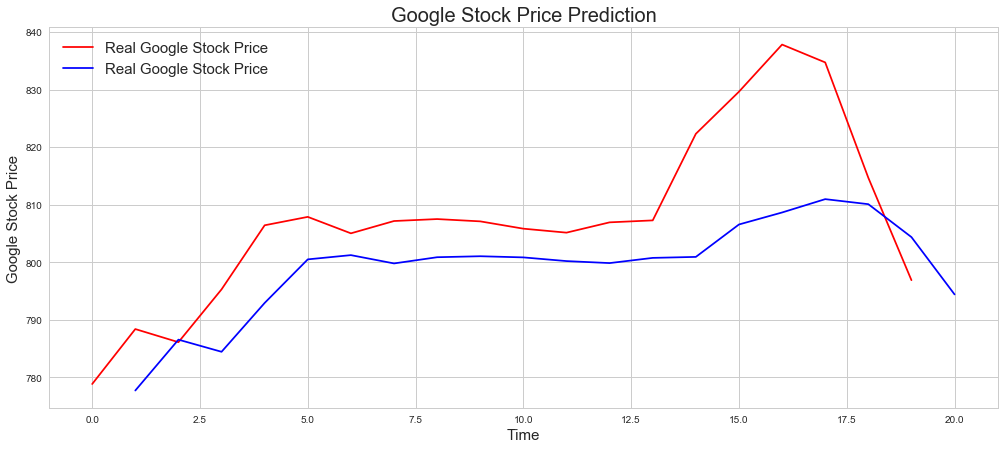

In [16]:
plt.figure(figsize=(17,7))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(range(1,1+len(predicted_stock_price)), predicted_stock_price, color='blue', label='Real Google Stock Price')
plt.title('Google Stock Price Prediction', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Google Stock Price', fontsize=15)
plt.legend(loc=2, prop={'size': 15})